# Exam of programmation and big data

The objective of this work is therefore to predict from statistical, econometric and machine learning methods, the land value according to the type of real estate. To do this we will rely on the databases from a French Administrative Direction, namely the Directorate General of Public Finance (DGFiP). The databases date from 2016 to 2021 and lists all real estate sales made over the last six years, in metropolitan France and in the overseas departments and territories except in Mayotte and Alsace-Moselle. We will work both on SQL and Python language 
The data base  can be downloaded on https://www.data.gouv.fr/fr/datasets/demandes-de-valeurs-foncieres/

Made by : Liassou Rachad(EBDS),  Idrissou Hadare(EBDS) ,  Zinsou-Ply Freedel (APE)

In [1]:
#import database
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import matplotlib
import warnings
from sklearn.model_selection import cross_val_score
warnings.filterwarnings("ignore") # Don't want to see the warnings in the notebook
from sklearn import svm

### 1) Importation of data base and selection of a region

Importation

In [3]:
valeurfoncière_2016=pd.read_csv(r'C:\Users\33758\Desktop\Exam\valeursfoncieres_2016-s2.txt',sep='|')
valeurfoncière_2017=pd.read_csv(r'C:\Users\33758\Desktop\Exam\valeursfoncieres_2017.txt',sep='|')
valeurfoncière_2018=pd.read_csv(r'C:\Users\33758\Desktop\Exam\valeursfoncieres_2018.txt',sep='|')
valeurfoncière_2019=pd.read_csv(r'C:\Users\33758\Desktop\Exam\valeursfoncieres_2019.txt',sep='|')
valeurfoncière_2020=pd.read_csv(r'C:\Users\33758\Desktop\Exam\valeursfoncieres_2020.txt',sep='|')
valeurfoncière_2021=pd.read_csv(r'C:\Users\33758\Desktop\Exam\valeursfoncieres_2021-s1.txt',sep='|')

In [4]:
valeurfoncière_2016.head(3)

,Code service CH,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,...,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,05/07/2016,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,S,NaN,13.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,01/07/2016,Vente,...,NaN,0,1.0,Maison,NaN,12.0,0.0,S,NaN,700.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,01/07/2016,Vente,...,NaN,0,1.0,Maison,NaN,101.0,5.0,S,NaN,700.0


In [5]:
valeurfoncière_2017.head(3)

,Code service CH,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,...,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,02/01/2017,Vente,...,NaN,2,2.0,Appartement,NaN,37.0,2.0,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,05/01/2017,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,AB,NaN,788.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,06/01/2017,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,P,NaN,42.0


In [6]:
valeurfoncière_2018.head(3)

,Code service CH,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,...,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2018,Vente,...,NaN,1,3.0,Dépendance,NaN,0.0,0.0,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2018,Vente,...,NaN,2,2.0,Appartement,NaN,73.0,4.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,04/01/2018,Vente,...,NaN,0,1.0,Maison,NaN,163.0,4.0,S,NaN,949.0


In [7]:
valeurfoncière_2019.head(3)

,Code service CH,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,...,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,04/01/2019,Vente,...,NaN,1,2.0,Appartement,NaN,20.0,1.0,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,04/01/2019,Vente,...,NaN,2,2.0,Appartement,NaN,62.0,3.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,04/01/2019,Vente,...,NaN,1,3.0,Dépendance,NaN,0.0,0.0,NaN,NaN,NaN


In [8]:
valeurfoncière_2020.head(3)

,Code service CH,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,...,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,07/01/2020,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,T,NaN,1061.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,02/01/2020,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,BT,NaN,85.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,02/01/2020,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,T,NaN,1115.0


In [9]:
valeurfoncière_2021.head(3)

,Code service CH,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,...,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,05/01/2021,Vente,...,NaN,0,1.0,Maison,NaN,97.0,5.0,S,NaN,2410.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,05/01/2021,Vente,...,NaN,0,3.0,Dépendance,NaN,0.0,0.0,S,NaN,2410.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,06/01/2021,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,BT,NaN,530.0


### 2-1) Designing the datatabase

We have separated the database into 4 tables:
-The first table called Locatilisation containing all the variables to locate or situate the land, apartment or house and having for primary key the department code

-The  second table called Mutation containing all the necessary information concerning the sale, or any other operation carried out on the land, the house or the apartment, this table has for primary key id of the mutation, this varibale is not in the database, but we think that it would be interesting to have a unique idendifiant associated with each operation, that will allow to find each operation details.

-The third table called Local Characteristic contains all the characteristics of the land, house or apartment, the primary key of this table is local id. 

-The last table Administration is the table that contains all the information related to the administrative documents of the houses or lands, the primary key is code service CH. 

All these tables are linked together by the id local

In [10]:
from IPython.display import Image

#### Design

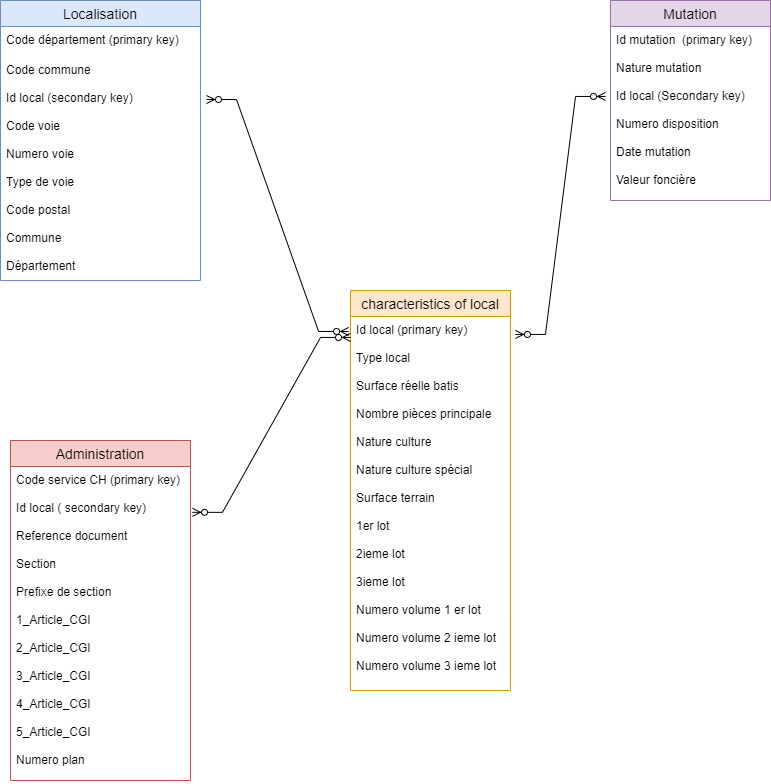

In [11]:
Image (filename= r'C:\Users\33758\Desktop\Exam\Disign.png')

#### Description of columns and theirs types 

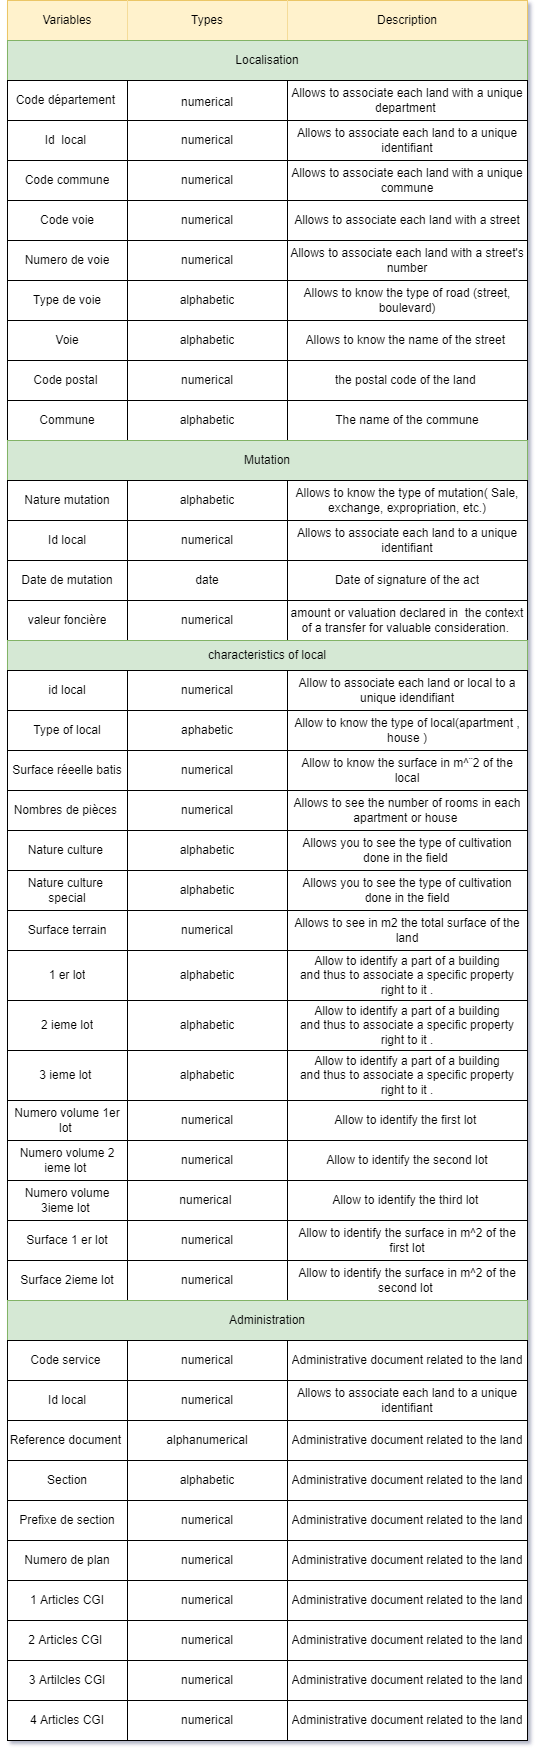

In [12]:
Image (filename= r'C:\Users\33758\Desktop\Exam\Designs.png')

### SQL query 

In [13]:
file=open(r"C:\Users\33758\Desktop\Cours APE\Premier semestre\S1A\Programmation for big data\Exam\Code_SQL.txt","r")
print("read function: ")
print(file.read())
print()

read function: 
********************************Importation of database:********************************************

CREATE DATABASE Projet;
USE Projet;
CREATE TABLE Base 
(CODE_service_CH float(10),
Reference_document float(10),
1_Articles_CGI float(10),
2_Articles_CGI float(10),
3_Articles_CGI float(10),
4_Articles_CGI FLOAT (10),
5_Articles_CGI FLOAT (10),
No_disposition INT (10), 
Date_mutation VARCHAR(10),
Nature_mutation VARCHAR(50),
Valeur_fonciere VARCHAR(10),
No_voie float(10),
B_T_Q VARCHAR (10),
Type_de_voie VARCHAR(50),
Code_voie VARCHAR(10),
Voie VARCHAR(50),
Code_postal FLOAT(20),
Commune VARCHAR(50),
Code_departement VARCHAR(20),
Code_commune INT(20),
Prefixe_de_section float(20),
Section VARCHAR(20),
No_plan INT(20),
No_Volume VARCHAR(20),
1er_lot VARCHAR(20),
Surface_Carrez_du_1er_lot VARCHAR(20),
2eme_lot VARCHAR(20),
Surface_Carrez_du_2eme_lot VARCHAR(20),
3eme_lot VARCHAR(20),
Surface_Carrezu_du_3eme_lot VARCHAR(20),
4eme_lot VARCHAR(20),
Surface_Carrez_du_4eme_lot

### 2-2) Data analysis and modeling 

### Selection of the area of study 

We will filtering of the bases by the variable Commune and choice of the most representative municipality

In [14]:
#Lets see the most representative Commune 

In [15]:
valeurfoncière_2016["Commune"].value_counts()

TOULOUSE                  13247
NANTES                     9294
BORDEAUX                   8285
MONTPELLIER                7931
NICE                       7612
                          ...  
SAINT PIERRE-DES-LOGES        1
ISLE-SUR-MARNE                1
ERLOY                         1
FRANCILLON-SUR-ROUBION        1
AUDRIX                        1
Name: Commune, Length: 29967, dtype: int64

In [16]:
valeurfoncière_2017["Commune"].value_counts()

TOULOUSE        31003
NANTES          19016
BORDEAUX        17624
NICE            17192
MONTPELLIER     16912
                ...  
ISLE ADAM           1
MONTJUSTIN          1
HIIS                1
CONTALMAISON        1
DOURNON             1
Name: Commune, Length: 31207, dtype: int64

In [17]:
valeurfoncière_2018["Commune"].value_counts()

TOULOUSE           27048
NICE               16672
NANTES             16149
MONTPELLIER        15365
BORDEAUX           14567
                   ...  
MERCEY LE GRAND        1
BAGIRY                 1
ERBAJOLO               1
PALOGNEUX              1
LAVAL MORENCY          1
Name: Commune, Length: 31177, dtype: int64

In [18]:
valeurfoncière_2019["Commune"].value_counts()

TOULOUSE       29329
NICE           18548
NANTES         16671
MONTPELLIER    15913
BORDEAUX       13574
               ...  
ORBAGNA            1
BARLEUX            1
NANTOIN            1
NESSA              1
MONTIGNE           1
Name: Commune, Length: 31124, dtype: int64

In [19]:
valeurfoncière_2020["Commune"].value_counts()

NICE                      17803
TOULOUSE                  16678
NANTES                    14733
BORDEAUX                  12917
MONTPELLIER               12055
                          ...  
LABASTIDE-DU-HAUT-MONT        1
ARGUEL                        1
ESCLAGNE                      1
VAUDRECOURT                   1
LENHARREE                     1
Name: Commune, Length: 30644, dtype: int64

In [20]:
valeurfoncière_2021["Commune"].value_counts()

NICE           9958
NANTES         7795
BORDEAUX       6649
TOULOUSE       6029
RENNES         5237
               ... 
FOUGARON          1
LEMPS             1
MARAC             1
MEOBECQ           1
LIEUVILLERS       1
Name: Commune, Length: 25210, dtype: int64

We noticed that over the 5 years, Toulouse is the most represented from 2016 to 2019 and is in the top 3 in 2020. On this basis, we decided to filter according to the city of Toulouse

In [21]:
city=["TOULOUSE"]
vf_2016=valeurfoncière_2016.loc[valeurfoncière_2016["Commune"].isin(city)]
vf_2017=valeurfoncière_2017.loc[valeurfoncière_2017["Commune"].isin(city)]
vf_2018=valeurfoncière_2018.loc[valeurfoncière_2018["Commune"].isin(city)]
vf_2019=valeurfoncière_2019.loc[valeurfoncière_2019["Commune"].isin(city)]
vf_2020=valeurfoncière_2020[valeurfoncière_2020["Commune"].isin(city)]
vf_2021=valeurfoncière_2021.loc[valeurfoncière_2021["Commune"].isin(city)]

In [22]:
vf_2016["Commune"].value_counts()

TOULOUSE    13247
Name: Commune, dtype: int64

In [23]:
#Concontenate all the data base
Base=pd.concat([vf_2019,vf_2020])

In [76]:
#Save as en csv file in our desktop
Base_csv=Base.to_csv("Base.csv")

### Database processing

In [25]:
## In this section we have focused on two years (2019, 2020). The reason for this is that we wanted to work on the most recent years mainly on Toulouse and as for the year 2021 we only have the values of the first half of the year, and because Toulouse was fourth, we have chosen (2019, 2020)

In [26]:
Base.info(),Base.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46007 entries, 993909 to 878070
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Code service CH             0 non-null      float64
 1   Reference document          0 non-null      float64
 2   1 Articles CGI              0 non-null      float64
 3   2 Articles CGI              0 non-null      float64
 4   3 Articles CGI              0 non-null      float64
 5   4 Articles CGI              0 non-null      float64
 6   5 Articles CGI              0 non-null      float64
 7   No disposition              46007 non-null  int64  
 8   Date mutation               46007 non-null  object 
 9   Nature mutation             46007 non-null  object 
 10  Valeur fonciere             45972 non-null  object 
 11  No voie                     41074 non-null  float64
 12  B/T/Q                       2478 non-null   object 
 13  Type de voie             

(None, (46007, 43))

In [27]:
null = ['Nature culture','Prefixe de section','B/T/Q','No Volume','Nature culture speciale','Surface Carrez du 5eme lot','Surface Carrez du 4eme lot','Surface Carrez du 3eme lot','Surface Carrez du 2eme lot','Surface Carrez du 1er lot','1er lot','2eme lot','3eme lot','4eme lot','5eme lot','Code service CH','Reference document','1 Articles CGI','2 Articles CGI','3 Articles CGI','4 Articles CGI','5 Articles CGI','Identifiant local','Commune','Code commune','Code departement']
Base=Base.drop(null,axis=1)
Base

,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,Type de voie,Code voie,Voie,Code postal,Section,No plan,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain
993909,1,05/01/2019,Vente,"255300,00",15.0,RUE,0608,D'AUBUISSON,31000.0,AC,319,2,2.0,Appartement,49.0,1.0,NaN
993910,1,03/01/2019,Vente,"380000,00",12.0,RUE,7888,SAINT LIGORY,31500.0,AB,581,0,1.0,Maison,52.0,2.0,160.0
993911,1,07/01/2019,Vente,"128000,00",13.0,RUE,6516,DES PAQUERETTES,31500.0,AD,42,2,2.0,Appartement,78.0,5.0,NaN
993915,1,09/01/2019,Vente,"155447,00",22.0,RUE,3824,DES GENETS,31500.0,AT,177,1,3.0,Dépendance,0.0,0.0,NaN
993916,1,09/01/2019,Vente,"155447,00",22.0,RUE,3824,DES GENETS,31500.0,AT,177,1,2.0,Appartement,78.0,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878065,1,23/10/2020,Vente,"165000,00",10.0,CHE,6264,NEGO SAOUMOS,31300.0,AV,114,1,3.0,Dépendance,0.0,0.0,NaN
878066,1,23/10/2020,Vente,"165000,00",10.0,CHE,6264,NEGO SAOUMOS,31300.0,AV,114,1,3.0,Dépendance,0.0,0.0,NaN
878067,1,23/10/2020,Vente,"165000,00",10.0,CHE,6264,NEGO SAOUMOS,31300.0,AV,114,1,2.0,Appartement,65.0,3.0,NaN
878069,1,20/08/2020,Vente,"645000,00",110.0,RUE,6236,DE NEGRENEYS,31200.0,AC,226,0,3.0,Dépendance,0.0,0.0,466.0


In [28]:
#Missing values checking
Base.isna().sum(), Base.isnull().sum()

(No disposition                   0
 Date mutation                    0
 Nature mutation                  0
 Valeur fonciere                 35
 No voie                       4933
 Type de voie                  3096
 Code voie                     1438
 Voie                          1440
 Code postal                   1441
 Section                          0
 No plan                          0
 Nombre de lots                   0
 Code type local              11788
 Type local                   11788
 Surface reelle bati          11802
 Nombre pieces principales    11802
 Surface terrain              38948
 dtype: int64,
 No disposition                   0
 Date mutation                    0
 Nature mutation                  0
 Valeur fonciere                 35
 No voie                       4933
 Type de voie                  3096
 Code voie                     1438
 Voie                          1440
 Code postal                   1441
 Section                          0
 No plan     

In [29]:
#Missing values dropped
Base=Base.dropna()
Base

,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,Type de voie,Code voie,Voie,Code postal,Section,No plan,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain
993910,1,03/01/2019,Vente,"380000,00",12.0,RUE,7888,SAINT LIGORY,31500.0,AB,581,0,1.0,Maison,52.0,2.0,160.0
993938,1,09/01/2019,Vente,"800000,00",2.0,AV,2651,DIDIER DAURAT,31400.0,BC,129,0,4.0,Local industriel. commercial ou assimilé,1800.0,0.0,6281.0
993941,1,03/01/2019,Vente,"181200,00",12.0,RUE,4836,JULIA,31500.0,AC,119,1,3.0,Dépendance,0.0,0.0,10.0
993985,1,08/01/2019,Vente,"215000,00",28.0,RUE,1955,CHARLES TRENET,31200.0,AC,489,0,1.0,Maison,89.0,4.0,274.0
994125,1,02/01/2019,Vente,"337700,00",18.0,RUE,0160,ALEXANDRE SOUMET,31500.0,AO,123,0,1.0,Maison,70.0,4.0,383.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871895,1,24/12/2020,Vente,"212500,00",17.0,RUE,6753,DU PERE BERGOUNIOUX,31100.0,AX,165,0,1.0,Maison,77.0,4.0,129.0
871900,1,23/12/2020,Vente,"309800,00",2.0,ALL,1968,DU CHAROLAIS,31300.0,AM,131,0,1.0,Maison,93.0,5.0,185.0
871922,1,23/12/2020,Vente,"560000,00",5.0,RUE,2424,DE CUGNAUX,31300.0,AM,74,0,1.0,Maison,96.0,3.0,281.0
878069,1,20/08/2020,Vente,"645000,00",110.0,RUE,6236,DE NEGRENEYS,31200.0,AC,226,0,3.0,Dépendance,0.0,0.0,466.0


In [30]:
Base.isnull().sum()

No disposition               0
Date mutation                0
Nature mutation              0
Valeur fonciere              0
No voie                      0
Type de voie                 0
Code voie                    0
Voie                         0
Code postal                  0
Section                      0
No plan                      0
Nombre de lots               0
Code type local              0
Type local                   0
Surface reelle bati          0
Nombre pieces principales    0
Surface terrain              0
dtype: int64

In [31]:
# Converting feature Date mutation to date format
Base['Date'] =pd.to_datetime(Base["Date mutation"])
Base.sort_values(by=['Date'], inplace=True, ascending=True)

### Some statistique descriptive

In [32]:
##Nature of mutation 

In [33]:
#To see the nature of mutation  which have the most operation
percentage=Base['Nature mutation'].value_counts(normalize=True)*100
v_real=Base['Nature mutation'].value_counts()
df=pd.DataFrame({'Count':v_real, 'percentage':percentage})
df

,Count,percentage
Vente,5110,98.080614
Echange,77,1.477927
Adjudication,12,0.230326
Vente en l'état futur d'achèvement,10,0.191939
Vente terrain à bâtir,1,0.019194


As you can see the most common type of transfer in real estate transactions are the sale of land and sale in the future state of completion

In [34]:
#Type of local

In [35]:
Base['Type local'].value_counts()

Maison                                      2073
Appartement                                 1875
Dépendance                                   768
Local industriel. commercial ou assimilé     494
Name: Type local, dtype: int64

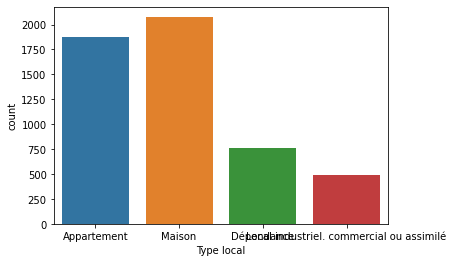

In [36]:
# To see the most type of local which have the most sale 
sns.countplot(x='Type local', data=Base)
plt.savefig("stat1.png")

As we can see the most common type local which have more sale are house  and Appartement

In [37]:
#Average property value depending on the type of mutation 

In [38]:
#We notice that Valeur foncière is not integer variable, so we should convert into integer before 
Base['Valeur fonciere']=Base['Valeur fonciere'].str.replace(',','').astype(float)

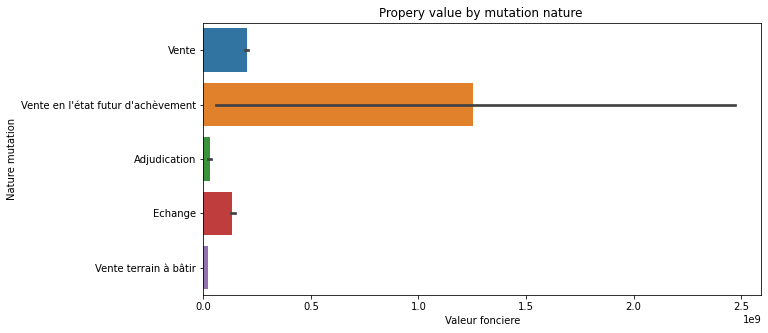

In [39]:
plt.figure(figsize=(10,5))
plt.title("Propery value by mutation nature ")
Av= sns.barplot(x="Valeur fonciere",y="Nature mutation",data= Base)
plt.savefig("stat2.png")

In [40]:
#Average property value depending on the type of local

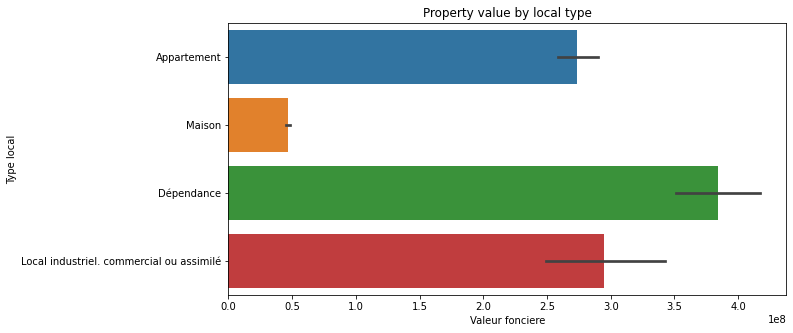

In [41]:
plt.figure(figsize=(10,5))
plt.title("Property value by local type")
Av= sns.barplot(x="Valeur fonciere",y="Type local",data= Base)
plt.savefig("stat2.png")

In [42]:
#Average property value depending on the surface

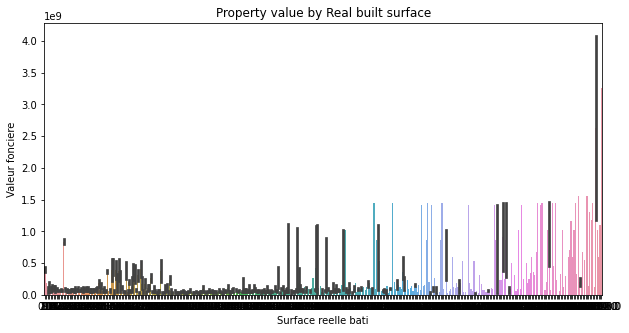

In [44]:
plt.figure(figsize=(10,5))
plt.title("Property value by Real built surface")
Av= sns.barplot(x="Surface reelle bati",y="Valeur fonciere",data= Base)
plt.savefig("stat3.png")

As you can see, the larger the area, the higher the land value

In [45]:
#Property value by number of main pieces

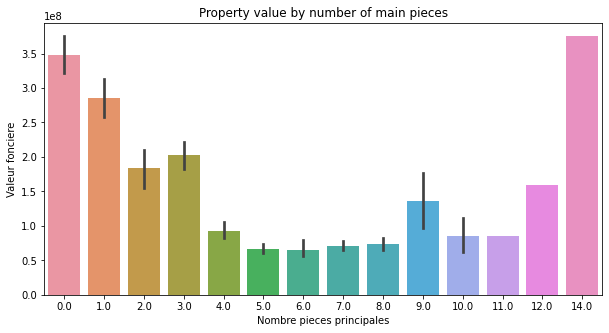

In [46]:
plt.figure(figsize=(10,5))
plt.title("Property value by number of main pieces")
Av= sns.barplot(x="Nombre pieces principales",y="Valeur fonciere",data= Base)
plt.savefig("stat4.png")

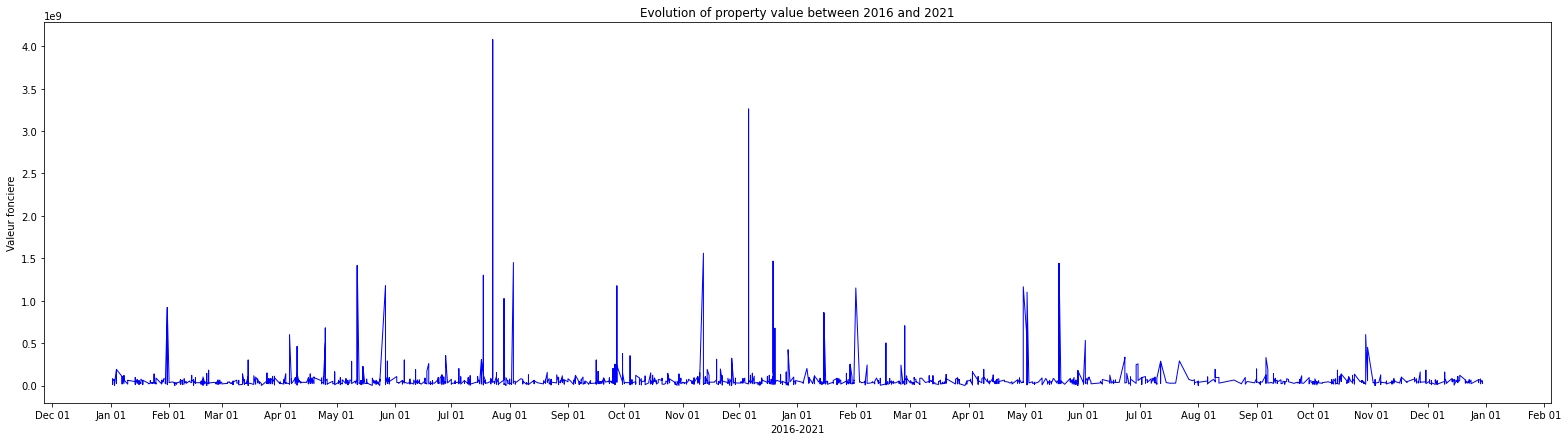

<Figure size 432x288 with 0 Axes>

In [47]:
#To see the evolution of property sale by time
import matplotlib.dates as mdates
fig = plt.figure(figsize = (27,7))
ax = plt.axes()
#set ticks every month
ax.xaxis.set_major_locator(mdates.MonthLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.plot(Base['Date'],Base['Valeur fonciere'],color='b', linewidth=1)
plt.xlabel("2016-2021")
plt.ylabel("Valeur fonciere")
plt.title('Evolution of property value between 2016 and 2021')
plt.show()
plt.savefig("stat5.png")

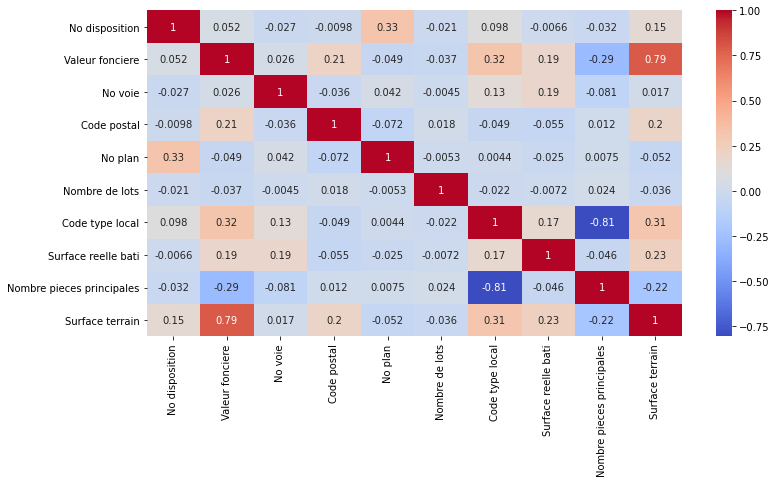

In [49]:
#coorelation matrix
plt.figure(figsize=(12,6))
sns.heatmap(Base.corr(),cmap='coolwarm',annot=True)
plt.savefig("stat6.png")

### Econometric and Machine learning analysis

In [48]:
Base.head()

,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,Type de voie,Code voie,Voie,Code postal,Section,No plan,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,Date
995665,1,01/02/2019,Vente,59500000.0,10.0,AV,5956,DES MINIMES,31200.0,AE,589,0,2.0,Appartement,34.0,1.0,132.0,2019-01-02
1022379,1,01/02/2019,Vente,50000000.0,41.0,RUE,4000,DE LA GRAVETTE,31300.0,AM,137,0,1.0,Maison,149.0,5.0,526.0,2019-01-02
1021763,1,01/02/2019,Vente,17300000.0,10.0,RUE,5365,LOUIS DE BROGLIE,31100.0,AN,254,0,1.0,Maison,63.0,3.0,149.0,2019-01-02
995666,1,01/02/2019,Vente,59500000.0,10.0,AV,5956,DES MINIMES,31200.0,AE,589,0,2.0,Appartement,34.0,1.0,132.0,2019-01-02
996443,1,01/02/2019,Vente,78000000.0,39.0,RUE,8636,DE TUNIS,31200.0,AD,12,0,3.0,Dépendance,0.0,0.0,581.0,2019-01-02


In [49]:
X=Base[["Surface reelle bati","Surface terrain","Nombre pieces principales","Nombre de lots","Nature mutation","Type local"]]
y=Base['Valeur fonciere']

In [50]:
#Create dummy variables to capture the effect of each modality of the categorical variables
Xcat=pd.get_dummies(X[["Nature mutation","Type local"]], drop_first = True)

In [51]:
Xnum=X[["Surface reelle bati","Surface terrain","Nombre pieces principales","Nombre de lots"]]

In [52]:
x=pd.concat([Xcat, Xnum], axis = 1)

In [53]:
x.head(5)

,Nature mutation_Echange,Nature mutation_Vente,Nature mutation_Vente en l'état futur d'achèvement,Nature mutation_Vente terrain à bâtir,Type local_Dépendance,Type local_Local industriel. commercial ou assimilé,Type local_Maison,Surface reelle bati,Surface terrain,Nombre pieces principales,Nombre de lots
995665,0,1,0,0,0,0,0,34.0,132.0,1.0,0
1022379,0,1,0,0,0,0,1,149.0,526.0,5.0,0
1021763,0,1,0,0,0,0,1,63.0,149.0,3.0,0
995666,0,1,0,0,0,0,0,34.0,132.0,1.0,0
996443,0,1,0,0,1,0,0,0.0,581.0,0.0,0


In [54]:
#Train and test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)

### Multiple Linear Regression fitting

In [55]:

from sklearn.linear_model import LinearRegression
LinReg = LinearRegression()
LinReg.fit(x_train,y_train)
print ("R2 of Linear Regresson:", LinReg.score(x_train,y_train) )

R2 of Linear Regresson: 0.6654485395942955


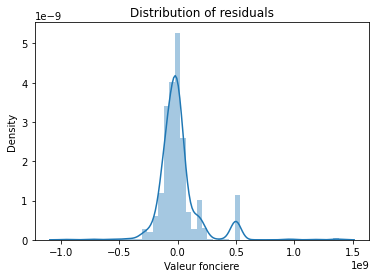

In [56]:
# Creating a Histogram of Residuals
plt.figure(figsize=(6,4))
sns.distplot(y_test - LinReg.predict(x_test))
plt.title('Distribution of residuals');
plt.savefig("stat7.png")

In [57]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [58]:
import statsmodels.api as sm

In [59]:
#Multiple linear regression stats model
x_train = sm.add_constant(x_train) # adding a constant
model = sm.OLS(y_train, x_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Valeur fonciere   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     751.5
Date:                Thu, 06 Jan 2022   Prob (F-statistic):               0.00
Time:                        21:15:24   Log-Likelihood:                -85649.
No. Observations:                4168   AIC:                         1.713e+05
Df Residuals:                    4156   BIC:                         1.714e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

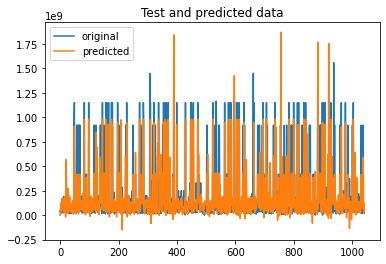

In [60]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, LinReg.predict(x_test),label="predicted")
plt.title("Test and predicted data")
plt.legend()
plt.show()

In [61]:
##PCA TO REDUCE DIMENSION AND CHECK IF WE HAVE AN AMELIORATION OF OUR MODEL

In [62]:
#explained_variance_
from sklearn.decomposition import PCA
acp = PCA(svd_solver='full')
coord = acp.fit_transform(x)
print(acp.explained_variance_)

[8.89325862e+06 2.54912179e+05 4.18223888e+00 1.17319119e-01
 1.02510634e-01 4.13567956e-02 2.84281843e-02 5.52227745e-03
 3.16386391e-03 7.04746539e-04 1.73064122e-04]


In [63]:
#Information quantity explained by thr firs two components
np.cumsum(acp.explained_variance_ratio_)[2]

0.9999999672963541

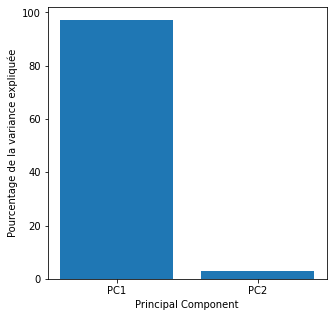

<Figure size 432x288 with 0 Axes>

In [64]:
# Percentage of information explaines by every two first components

pca = PCA(n_components=2)
pca.fit(x)
#pca_data = pca.transform(X) # get PCA coordinates for scaled_data
coord = pca.fit_transform(x)
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1) #pourcentage de variation que chaque PC représente
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
plt.figure(figsize=(5,5))

plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Pourcentage de la variance expliquée')
plt.xlabel('Principal Component')
plt.title('')
plt.show()
plt.savefig("stat8.png")

In [65]:
# The two first components chosen
coord=pd.DataFrame(coord)
coord

,0,1
0,-1454.028423,-25.740591
1,-1055.554484,72.641467
2,-1435.828000,2.521364
3,-1454.028423,-25.740591
4,-1006.848292,-78.533519
...,...,...
5205,-1509.714184,30.643515
5206,-1344.740411,2.702975
5207,-1345.452461,-14.282020
5208,-1198.679505,-70.484619


In [66]:
#train test split based on our two components
coord_train, coord_test, y_train, y_test = train_test_split(coord, y, test_size=0.2, random_state=42)

In [67]:
#Multiple linear regression based on PCA
LinReg = LinearRegression()
LinReg.fit(coord_train,y_train)
print ("R2 of Linear Regresson:", LinReg.score(coord_train,y_train) )

R2 of Linear Regresson: 0.6135214354998357


### SVR MODEL

In [68]:
#TRAIN TEST SPLIT FOR SVR 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)

In [69]:
# First, let's choose which kernel is the best for our data
for k in ['linear','poly','rbf','sigmoid']:
    clf = svm.SVR(kernel=k)
    clf.fit(x_train, y_train)
    confidence = clf.score(x_train, y_train)
    print(k,confidence)

linear 0.5639997861294169
poly -0.17009526933569452
rbf -0.17117566175773824
sigmoid -0.1711762849159173


In [70]:
#definition of the regression model with the LinearSVR class using the default parameters of the LinearSVR class.
from sklearn.svm import LinearSVR
lsvr = LinearSVR(verbose=0, dual=True)
print(lsvr)
LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

LinearSVR()


LinearSVR()

In [71]:
#Fitting the model to the train data and checking the accuracy score of the model
lsvr.fit(x_train, y_train)

score = lsvr.score(x_train, y_train)
print("R-squared:", score)

R-squared: 0.5589520531374884


In [72]:
cv_score = cross_val_score(lsvr, x_train, y_train, cv = 10)
print("CV mean score: ", cv_score.mean())

CV mean score:  0.5650520793576204


In [73]:
#Predicted test data using the trained model and verified the accuracy of the predicted data using the MSE and RMSE metrics.
ypred = lsvr.predict(x_test)
mse = mean_squared_error(y_test, ypred)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0))

MSE:  3.7105337241440056e+16
RMSE:  1.8552668620720028e+16


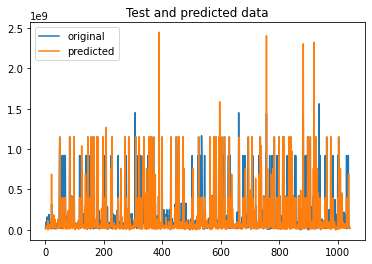

<Figure size 432x288 with 0 Axes>

In [74]:
#Visualization of the original and predicted data on a graph.
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, ypred, label="predicted")
plt.title("Test and predicted data")
plt.legend()
plt.show()
plt.savefig("stat9.png")

### Conclusion

This assignment allowed us to deepen our knowledge in database management, mainly on the formation of several tables from a database, and the processing on the statistical, econometric and machine learning level. The formation of several tables allowed us to avoid duplicates and to better structure our database and the data processing and analysis part, how to better describe a database, how to process it, analyze it, make econometric and machine learning models. All this work has been done in two languages, SQL and Python, two languages that are essential in the world of programming, analysis and data processing.
In order to estimate and predict the land value, we proceeded to the estimation of two models: a linear model and an SVR model.The results of our model allow us to say that both models predict well, but the linear multiple regression even more 